In [0]:
# !mv /content/Competitions_results_cleaned.csv /content/sample_data/

In [0]:
# Импорт библиотек
import numpy
import pandas as pd

In [0]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [0]:
# Задаем рабочую папку
import os
os.chdir("/content/sample_data")

In [0]:
# Импорт данных
competitions_df = pd.read_csv('Competitions_results_cleaned.csv', sep=',', parse_dates=['date'])

In [7]:
#  Знакомимся с данными
competitions_df.dtypes

place                        int64
last_name                   object
first_name                  object
birth_year                   int64
city                        object
team                        object
country                     object
result                      object
disc                       float64
points                     float64
athlete_group               object
distance                     int64
style                       object
date                datetime64[ns]
pool_city                   object
pool_description            object
id                           int64
pool_size                    int64
result_s                   float64
gender                      object
dtype: object

In [8]:
#  Знакомимся с данными
competitions_df.head()
#competitions_df.tail()
#competitions_df.shape

,place,last_name,first_name,birth_year,city,team,country,result,disc,points,athlete_group,distance,style,date,pool_city,pool_description,id,pool_size,result_s,gender
0,1,Евмененко,София,2007,Долгопрудный,ДЮСШ,RUS,00:00:33.50,NaN,387.0,Девочки 2007г.р. и моложе,50,баттерфляй,2019-04-22,г.Жлобин,бассейн 50м.,8,50,33.50,Д
1,2,Редюк,Алина,2007,Гомель-1,ГОЦОР ввс,BLR,00:00:35.44,NaN,327.0,Девочки 2007г.р. и моложе,50,баттерфляй,2019-04-22,г.Жлобин,бассейн 50м.,9,50,35.44,Д
2,3,Козловская,Кристина,2007,Минск,Волна,BLR,00:00:36.10,NaN,309.0,Девочки 2007г.р. и моложе,50,баттерфляй,2019-04-22,г.Жлобин,бассейн 50м.,10,50,36.10,Д
3,4,Карпочева,Екатерина,2007,Речица,Олимп,BLR,00:00:36.62,NaN,296.0,Девочки 2007г.р. и моложе,50,баттерфляй,2019-04-22,г.Жлобин,бассейн 50м.,11,50,36.62,Д
4,5,Гисак,Анна,2007,Могилев,СДЮШОР,BLR,00:00:36.96,NaN,288.0,Девочки 2007г.р. и моложе,50,баттерфляй,2019-04-22,г.Жлобин,бассейн 50м.,12,50,36.96,Д


In [9]:
group = 'Девушки 2004-2005 г.р.'
style = 'вольный стиль'
df = competitions_df[competitions_df['athlete_group'] == group][['last_name', 'first_name', 'gender', 'birth_year', 'distance', 'style', 'result_s', 'points']]
df = df[df['style'] == style]

df.head()
# df.shape


,last_name,first_name,gender,birth_year,distance,style,result_s,points
236,Коршак,Елизавета,Д,2005,400,вольный стиль,303.59,472.0
237,Дурнева,Ольга,Д,2004,400,вольный стиль,308.93,448.0
238,Хлистунова,Кристина,Д,2005,400,вольный стиль,314.57,424.0
239,Горовая,Марина,Д,2004,400,вольный стиль,315.60,420.0
240,Катиленец,София,Д,2005,400,вольный стиль,317.30,413.0


In [10]:
# найдем список спортсменов, кто участвовал в нескольких дистанциях
# эквивалент sql-запроса 
# select last_name, first_name from df group by last_name, first_name having count(1) > 1

grouped_dict = df.groupby(['last_name', 'first_name']).groups 
athletes = [key for key, value in grouped_dict.items() if len(value)>1]
athletes

[('Андрусевич', 'Диана'),
 ('Болдырева', 'Инна'),
 ('Горовая', 'Марина'),
 ('Котягова', 'Ксения'),
 ('Наумова', 'Ксения'),
 ('Парванова', 'Дарья'),
 ('Подвязнова', 'Анастасия'),
 ('Хлистунова', 'Кристина')]

In [11]:
# соберем результаты этих спортсменов в одном дата-фрейме

# Вариант 1
df2 = df.groupby(['last_name', 'first_name']).filter(lambda g: len(g) > 1).sort_values(by=['last_name', 'first_name'])
df2.shape

(16, 8)

In [12]:
# Вариант 2
df2 = df[(df['last_name'] == athletes[0][0]) & (df['first_name'] == athletes[0][1])]
for ln, fn in athletes[1:]:
  df2 = pd.concat([df2, df[(df['last_name'] == ln) & (df['first_name'] == fn)]], axis=0) 

df2

,last_name,first_name,gender,birth_year,distance,style,result_s,points
250,Андрусевич,Диана,Д,2005,400,вольный стиль,344.36,323.0
854,Андрусевич,Диана,Д,2005,100,вольный стиль,74.01,341.0
246,Болдырева,Инна,Д,2005,400,вольный стиль,330.80,365.0
853,Болдырева,Инна,Д,2005,100,вольный стиль,72.31,365.0
239,Горовая,Марина,Д,2004,400,вольный стиль,315.60,420.0
849,Горовая,Марина,Д,2004,100,вольный стиль,66.25,475.0
243,Котягова,Ксения,Д,2005,400,вольный стиль,327.59,376.0
851,Котягова,Ксения,Д,2005,100,вольный стиль,68.82,424.0
247,Наумова,Ксения,Д,2005,400,вольный стиль,332.56,359.0
848,Наумова,Ксения,Д,2005,100,вольный стиль,65.38,494.0


In [13]:
# Вариант 3
# 1. Создать датафрейм athletes_df на базе списка атлетов athletes 

athletes_df = pd.DataFrame(athletes, columns=['last_name', 'first_name']) 

# 2. Выполнить операцию внутреннего соединения df и athletes_df

df2 = pd.merge(df, athletes_df, on=['last_name', 'first_name'], how='inner')


# недостаток этого метада - несогласованный порядок записей в двух датафреймах,
# для построения графиков нужно сортировать датафреймы 
# в нашем случае один датафрейм (athlete_df) уже отсортирован)

df2 = df2.sort_values(by=['last_name', 'first_name'])
df2

,last_name,first_name,gender,birth_year,distance,style,result_s,points
12,Андрусевич,Диана,Д,2005,400,вольный стиль,344.36,323.0
13,Андрусевич,Диана,Д,2005,100,вольный стиль,74.01,341.0
8,Болдырева,Инна,Д,2005,400,вольный стиль,330.80,365.0
9,Болдырева,Инна,Д,2005,100,вольный стиль,72.31,365.0
2,Горовая,Марина,Д,2004,400,вольный стиль,315.60,420.0
3,Горовая,Марина,Д,2004,100,вольный стиль,66.25,475.0
6,Котягова,Ксения,Д,2005,400,вольный стиль,327.59,376.0
7,Котягова,Ксения,Д,2005,100,вольный стиль,68.82,424.0
10,Наумова,Ксения,Д,2005,400,вольный стиль,332.56,359.0
11,Наумова,Ксения,Д,2005,100,вольный стиль,65.38,494.0


**Задача1.**

На какой дистанции спортсмены показали себя лучше? Кто из них лучший спринтер, а кто лучший стайер?

Попробуем определить ответы на эти вопросы, построив 2 графика

*1. Дистанция/Время*

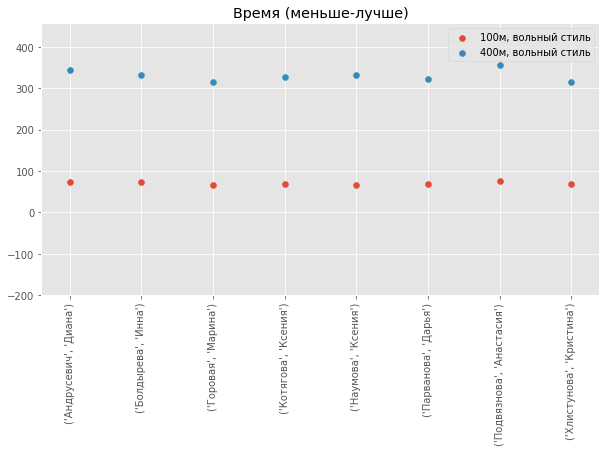

In [14]:
X = [str(athletes) for athletes in athletes]
Y1 = df2[df2['distance'] == 100]['result_s'] 
Y2 = df2[df2['distance'] == 400]['result_s'] 

plt.figure(figsize=(10,5))
plt.scatter(X, Y1, label='100м, вольный стиль')
plt.scatter(X, Y2, label='400м, вольный стиль')

# plt.hlines(y=Y1.mean(), xmin=X[0], xmax=X[-1], linestyle='--', color='red')
# plt.hlines(y=Y2.mean(), xmin=X[0], xmax=X[-1], linestyle='--', color='blue')

plt.ylim(-200, max(Y2)+100)
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.title('Время (меньше-лучше)')

plt.show()

График невыразительный

*2. Дистанция/Очки*

Использование производной метрики ("фичи") points позволяет лучше видеть данные:

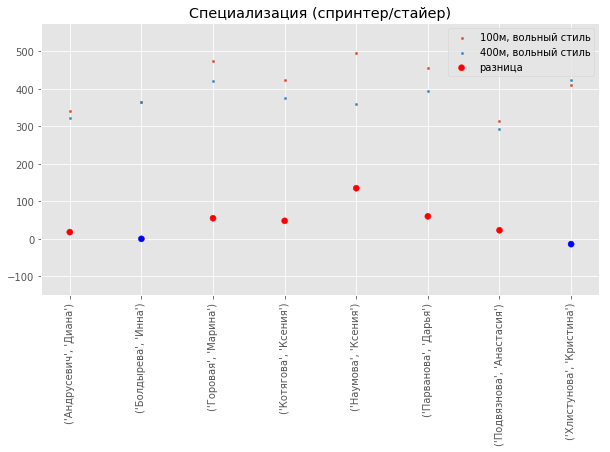

In [15]:
X = [str(athletes) for athletes in athletes]
Y1 = df2[df2['distance'] == 100]['points'] 
Y2 = df2[df2['distance'] == 400]['points'] 
Y3 = numpy.array([Y1.iloc[i] - Y2.iloc[i] for i in range(len(Y1))])

colors = numpy.where(Y3 > 10, 'red', 'blue')
plt.figure(figsize=(10,5))
plt.scatter(X, Y1, s=5, label='100м, вольный стиль')
plt.scatter(X, Y2, s=5, label='400м, вольный стиль')
plt.scatter(X, Y3, color=colors, label='разница')

# plt.hlines(y=Y1.mean(), xmin=X[0], xmax=X[-1], linestyle='--', color='red')
# plt.hlines(y=Y2.mean(), xmin=X[0], xmax=X[-1], linestyle='--', color='blue')

plt.ylim(-150, max(Y2)+150)
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.title('Специализация (спринтер/стайер)')

plt.show()

Выглядит неплохо.

*Тот же график для юношей:*

In [16]:
# подготавливаем данные

group = 'Юноши 2004-2005 г.р.'
style = 'вольный стиль'

df = competitions_df[competitions_df['athlete_group'] == group][['last_name', 'first_name', 'gender', 'birth_year', 'distance', 'style', 'result_s', 'points']]
df = df[df['style'] == style]

# Плохие для группировки строки: df[(df['first_name'].isnull()) | (df['last_name'].isnull())]
df = df.dropna(axis='index', how='any', subset=['first_name'])

grouped_dict = df.groupby(['last_name', 'first_name']).groups 
athletes = [key for key, value in grouped_dict.items() if len(value)>1]

df2 = df.groupby(['last_name', 'first_name']).filter(lambda g: len(g)>1).sort_values(by=['last_name', 'first_name'])
df2.head(6)

,last_name,first_name,gender,birth_year,distance,style,result_s,points
281,Акульков,Данила,М,2004,400,вольный стиль,306.95,368.0
861,Акульков,Данила,М,2004,100,вольный стиль,60.45,467.0
266,Бабенко,Степан,М,2005,400,вольный стиль,289.01,441.0
866,Бабенко,Степан,М,2005,100,вольный стиль,62.53,422.0
262,Байкачев,Евгений,М,2004,400,вольный стиль,278.44,493.0
859,Байкачев,Евгений,М,2004,100,вольный стиль,58.24,522.0


Text(0.5, 1.0, 'Специализация (спринтер/стайер)')

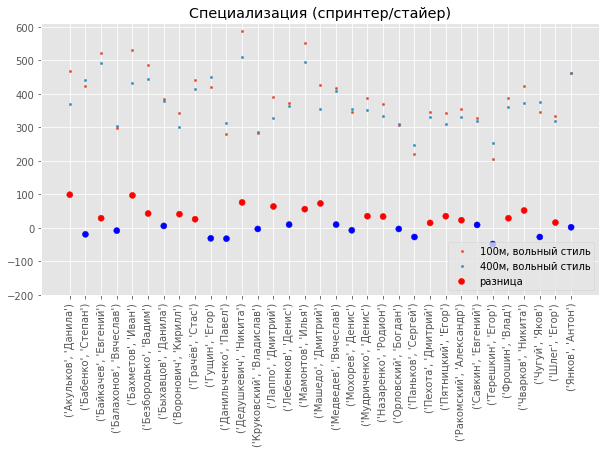

In [17]:
# рисуем график для юношей

X = [str(athletes) for athletes in athletes]

Y1 = df2[df2['distance'] == 100]['points'] 
Y2 = df2[df2['distance'] == 400]['points'] 
Y3 = numpy.array([Y1.iloc[i] - Y2.iloc[i] for i in range(len(Y1))])

plt.figure(figsize=(10,5))

plt.scatter(X, Y1, s=5, label='100м, вольный стиль')
plt.scatter(X, Y2, s=5, label='400м, вольный стиль')

colors = numpy.where(Y3 > 10, 'red', 'blue')
plt.scatter(X, Y3, color=colors, label='разница')

plt.ylim(-200, max(Y2)+100)
plt.xticks(rotation=90)
plt.legend(loc='lower right')
plt.title('Специализация (спринтер/стайер)')

In [18]:
# Специализация (спринтер/стайер):

specializations1 = {(athlete[1], 'спринтер' if athlete[0] == 'red' else 'стайер') for athlete in zip(colors, athletes)}
specializations1

{(('Акульков', 'Данила'), 'спринтер'),
 (('Бабенко', 'Степан'), 'стайер'),
 (('Байкачев', 'Евгений'), 'спринтер'),
 (('Балахонов', 'Вячеслав'), 'стайер'),
 (('Бахметов', 'Иван'), 'спринтер'),
 (('Безбородько', 'Вадим'), 'спринтер'),
 (('Быхавцов', 'Данила'), 'стайер'),
 (('Воронович', 'Кирилл'), 'спринтер'),
 (('Грачёв', 'Стас'), 'спринтер'),
 (('Гущин', 'Егор'), 'стайер'),
 (('Данильченко', 'Павел'), 'стайер'),
 (('Дедушкевич', 'Никита'), 'спринтер'),
 (('Круковский', 'Владислав'), 'стайер'),
 (('Лаппо', 'Дмитрий'), 'спринтер'),
 (('Лебенков', 'Денис'), 'стайер'),
 (('Мамонтов', 'Илья'), 'спринтер'),
 (('Машедо', 'Дмитрий'), 'спринтер'),
 (('Медведев', 'Вячеслав'), 'стайер'),
 (('Мохорев', 'Денис'), 'стайер'),
 (('Мудриченко', 'Денис'), 'спринтер'),
 (('Назаренко', 'Родион'), 'спринтер'),
 (('Орловский', 'Богдан'), 'стайер'),
 (('Паньков', 'Сергей'), 'стайер'),
 (('Пехота', 'Дмитрий'), 'спринтер'),
 (('Пятницкий', 'Егор'), 'спринтер'),
 (('Ракомский', 'Александр'), 'спринтер'),
 (('Са

Модель для определения склонности пловца к коротким или длинным дистанциям (спринтер/стайер) найдена:

**if** (очки_короткая_дист - очки_длинная_дист > 10):

   спринтер  # red
    
**else**

   стайер  # blue


---


 Здесь 10 - это некоторое "разумно" подобранное под имеющиеся данные и ситуацию число (гиперпараметр). Оно может быть другим.


**Задача 2.**

Разбить лучших спортсменов на 2 группы по 10 пловцов, так чтоб самые сильные были в первой группе и следующие по силе во второй.
Обе группы будут плыть короткую и длинную дистанцию

Text(0.5, 1.0, 'Разбиение спортсменов на группы')

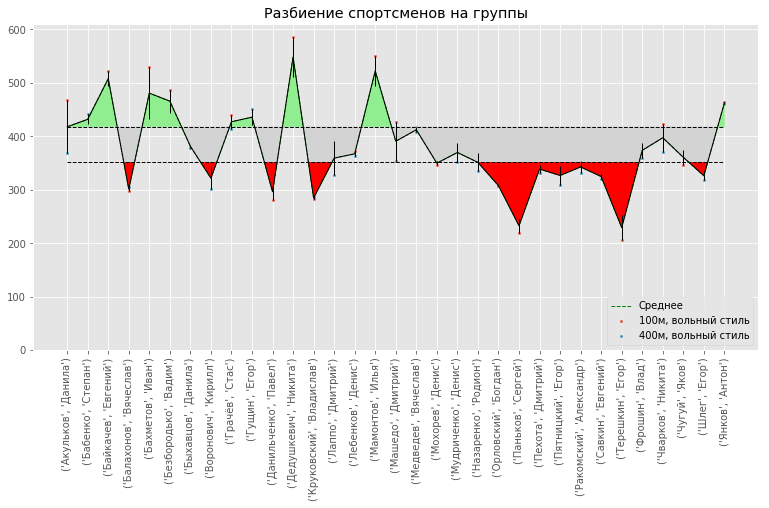

In [19]:
# Добавим новую переменную "среднее число очков"

Y4 = numpy.array([(Y1.iloc[i] + Y2.iloc[i])/2 for i in range(len(Y1))])

plt.figure(figsize=(13,6))
plt.scatter(X, Y1, s=5, label='100м, вольный стиль')
plt.scatter(X, Y2, s=5, label='400м, вольный стиль')
plt.plot(X, Y4, color='green', linestyle='--', linewidth=1, label='Среднее')
plt.errorbar(X, Y4, yerr=Y4-Y1, linewidth=1, color="black")

df3 = pd.DataFrame(zip(X,Y4), columns=['athlete', 'avg_points']) 
df3 = df3.sort_values(by=['avg_points'], ascending=False)

best10 = df3['avg_points'].nlargest(10).iloc[-1]
best20 = df3['avg_points'].nlargest(20).iloc[-1]

plt.hlines(y=best10, xmin=X[0], xmax=X[-1], linewidth=1, linestyles='--', color='black')
plt.hlines(y=best20, xmin=X[0], xmax=X[-1], linewidth=1, linestyles='--', color='black')

plt.fill_between(X, best10, Y4, where=(Y4 >= best10), interpolate=True, color='lightgreen')
plt.fill_between(X, best10, Y4, where=(Y4 < best10), interpolate=True, color='lightgray')
plt.fill_between(X, best20, Y4, where=(Y4 < best20), interpolate=True, color='red')


plt.ylim(0, max(Y2)+100)
plt.xticks(rotation=90)
plt.legend(loc='lower right')
plt.title('Разбиение спортсменов на группы')
# plt.tight_layout()

In [20]:
print('Состав группы #1:')
print(df3.loc[df3['avg_points'].nlargest(10).index, 'athlete'])

print('\nСостав группы #2:')
print(df3.loc[df3['avg_points'].nlargest(20).index[10:], 'athlete'])

Состав группы #1:
11    ('Дедушкевич', 'Никита')
15        ('Мамонтов', 'Илья')
2      ('Байкачев', 'Евгений')
4         ('Бахметов', 'Иван')
5     ('Безбородько', 'Вадим')
32          ('Янков', 'Антон')
9            ('Гущин', 'Егор')
1        ('Бабенко', 'Степан')
8           ('Грачёв', 'Стас')
0       ('Акульков', 'Данила')
Name: athlete, dtype: object

Состав группы #2:
17    ('Медведев', 'Вячеслав')
29       ('Чварков', 'Никита')
16       ('Машедо', 'Дмитрий')
6       ('Быхавцов', 'Данила')
28          ('Фрошин', 'Влад')
19     ('Мудриченко', 'Денис')
14       ('Лебенков', 'Денис')
30           ('Чугуй', 'Яков')
13        ('Лаппо', 'Дмитрий')
20     ('Назаренко', 'Родион')
Name: athlete, dtype: object


 ***Фактически, задачи 1 и 2 - это чистая аналитика а не ML***
 

---



**После некоторого знакомства с данными, попробуем решить более сложную задачу:**

Определить время спортсмена, зная как он выступил на дистанции другой длины


*Текущая задача - задача регрессии.* 

In [0]:
#  Вопросы:
#  - какой алгоритм регрессии использовать? как подбирать гиперпараметры?
#  - какие переменные (факторы) взять в рассмотрение?
#  - как разбить данные на тренировочную и тестовые группы?

In [22]:
# Сперва найдем роезультаты спортсменов одинакового стиля но разных дистанций

key = ['last_name', 'first_name', 'birth_year', 'style', 'gender']
# delta_distance = lambda x: (x[1,'result_s'] - x[0,'result_s'])

df = competitions_df.groupby(key) \
    .filter(lambda g: len(g)>=2) \
    .sort_values(by=['last_name', 'first_name', 'birth_year', 'style', 'distance']) \
    [['last_name', 'first_name', 'birth_year', 'style', 'distance', 'result_s', 'gender']]

df = df.pivot_table(index=key, columns='distance', values='result_s').reset_index()

df

distance,last_name,first_name,birth_year,style,gender,50,100,400
0,Акульков,Данила,2004,вольный стиль,М,NaN,60.45,306.95
1,Андрусевич,Диана,2005,вольный стиль,Д,NaN,74.01,344.36
2,Бабенко,Степан,2005,вольный стиль,М,NaN,62.53,289.01
3,Байкачев,Евгений,2004,вольный стиль,М,NaN,58.24,278.44
4,Балахонов,Вячеслав,2004,вольный стиль,М,NaN,70.24,326.62
5,Бахметов,Иван,2004,вольный стиль,М,NaN,57.97,291.06
6,Безбородько,Вадим,2005,вольный стиль,М,NaN,59.59,288.32
7,Болдырева,Инна,2005,вольный стиль,Д,NaN,72.31,330.80
8,Быхавцов,Данила,2004,вольный стиль,М,NaN,64.50,304.18
9,Воронович,Кирилл,2004,вольный стиль,М,NaN,67.02,328.25


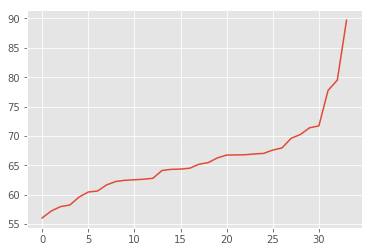

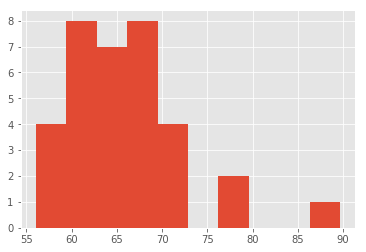

In [23]:
# график времени спортсмена в зависимости от занятого места
# после 30 места виден излом - кривая резко меняет свой тренд
# это выбросы, их можно удалить
male100_df = df[df['gender'] == 'М'][100].sort_values()
plt.plot(range(len(male100_df)), male100_df)
plt.show()

# эти же вибросы видны и на гистограмме
df[df['gender'] == 'М'][100].hist()

In [24]:
df.iloc[male100_df.index[-3:]]

distance,last_name,first_name,birth_year,style,gender,50,100,400
28,Паньков,Сергей,2005,вольный стиль,М,NaN,77.75,350.98
35,Терешкин,Егор,2005,вольный стиль,М,NaN,79.50,347.92
12,Гринцевич,Иван,2007,брасс,М,41.09,89.69,NaN


In [0]:
# удалим выбросы (в том числе лишний замер по брассу)
df = df.drop(male100_df.index[-3:])

In [0]:
# получам список дистанций при прочих равных
distances = list(set(df.columns) - {'last_name', 'first_name', 'birth_year', 'style', 'distance', 'gender'})

# расчет коэффициентов времени на разных дистанциях
# for i, d1 in enumerate(distances):
#   for d2 in distances[0:i]:
#     df['k_' + str(d1*1.0/d2)] = (df[d1]*d2)/(df[d2]*d1)

# df    

# df[df['gender'] == 'Д']['k_4.0'].describe()
# df[df['gender'] == 'М']['k_4.0'].describe()

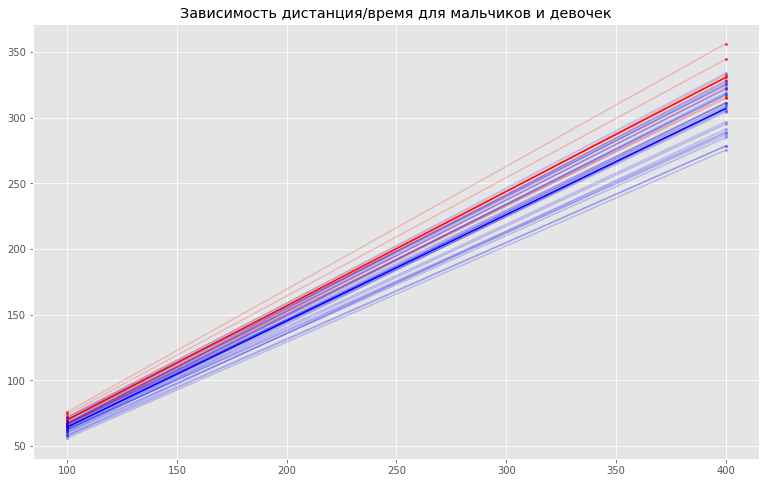

In [27]:
Y = numpy.array([(Y1.iloc[i] + Y2.iloc[i])/2 for i in range(len(Y1))])

plt.figure(figsize=(13,8))

df_female = df[df['gender'] == 'Д']
df_male = df[df['gender'] == 'М']

for d in distances:
  plt.scatter([d for _ in range(len(df_female))], df_female[d], s=5, color='red', alpha=0.8)
  plt.scatter([d for _ in range(len(df_male))], df_male[d], s=5, color='blue', alpha=0.3)

for i in range(len(df_male)):
  plt.plot([100, 400], [df_male.iloc[i][100], df_male.iloc[i][400]], color='blue', alpha=0.2)

for i in range(len(df_female)):
  plt.plot([100, 400], [df_female.iloc[i][100], df_female.iloc[i][400]], color='red', alpha=0.2)

plt.plot([100, 400], [df_male[100].mean(), df_male[400].mean()], color='blue')
plt.plot([100, 400], [df_female[100].mean(), df_female[400].mean()], color='red')

    
plt.title('Зависимость дистанция/время для мальчиков и девочек')
plt.show()
# plt.tight_layout()

In [0]:
# число наблюдений (спортсмены, плавающие одним стилем несколько дистанций) невелико. 
# две проблемы: 
# 1. тренировочный набор данных мал, поэтому качество модели будет страдать
# 2. в отношении многих имеющихся наблюдений (спортсмены,не входящие в выборку атлетов выше) 
#    нет возможности воспользоваться моделью
# может помочь аугументация данных и изобретение нофых фич 


**Вернемся к задаче прогнозирования (регрессии)**

Попробуем несколько разных алгоритмов (типов модели обучения):
- линейную регрессию
- полиномиальную регресию
- нейронную сеть

In [0]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression #, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

x_train, x_test, y_train, y_test = train_test_split(df[100], df[400], test_size=0.25, random_state=0)


In [29]:
# тренируем модель линейной регрессии

lr = LinearRegression()
lr.fit(pd.DataFrame(x_train), pd.DataFrame(y_train))
print('Коэффициенты линейной регрессии b0 = {}, b1 = {}'.format(float(lr.intercept_), float(lr.coef_)))

y_test_predict = lr.predict(pd.DataFrame(x_test))
# y_test_predict = float(lr.intercept_) + float(lr.coef_) * x_test

Коэффициенты линейной регрессии b0 = 73.00066906195121, b1 = 3.6460012773503583


In [30]:
# коэффициент детерминации линейной регрессии R^2 (чем ближе к 1, тем модель адекватнее)

lr.score(pd.DataFrame(df[100]), pd.DataFrame(df[400]))

0.824363535939814

In [31]:
# тренируем модель полиномиальной регрессии

model = Pipeline([
                  ('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression(fit_intercept=False))
                 ])
model.fit(pd.DataFrame(x_train), pd.DataFrame(y_train))
coef = model.named_steps['linear'].coef_[0]

print('Коэффициенты полиномиальной регрессии {}'.format(coef))

y_test_predict2 = pd.DataFrame(coef[0] + coef[1]*x_test + coef[2]*x_test**2)

Коэффициенты полиномиальной регрессии [-1.45590742e+02  1.04212661e+01 -5.22334122e-02]


In [32]:
# сравним линейную и квадратичную модели на тестовых данных

df_compare = pd.DataFrame()

df_compare['x_test'] = x_test
df_compare['400_real_test'] = y_test
df_compare['400_predict_test'] = y_test_predict
df_compare['400_predict_test2'] = y_test_predict2

df_compare = df_compare.sort_values(by=['x_test'])

df_compare['err1'] = (df_compare['400_predict_test']-df_compare['400_real_test']).abs()
df_compare['err2'] = (df_compare['400_predict_test2']-df_compare['400_real_test']).abs()

print('Сумма абсолютных ошибок линейной модели ', df_compare['err1'].sum())
print('Сумма абсолютных ошибок квадратичной модели ', df_compare['err2'].sum())

Сумма абсолютных ошибок линейной модели  59.07180613823533
Сумма абсолютных ошибок квадратичной модели  60.44449537684915


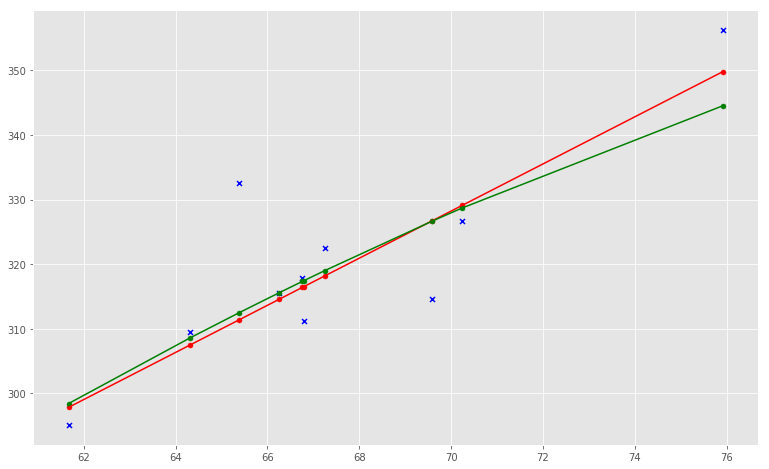

In [33]:
plt.figure(figsize=(13,8))

plt.scatter(df_compare['x_test'], df_compare['400_real_test'], s=25, marker='x', color='blue')
plt.scatter(df_compare['x_test'], df_compare['400_predict_test'], s=25, color='red')
plt.scatter(df_compare['x_test'], df_compare['400_predict_test2'], s=25, color='green')
plt.plot(df_compare['x_test'], df_compare['400_predict_test'], color='red')
plt.plot(df_compare['x_test'], df_compare['400_predict_test2'], color='green')

plt.xlabel = 'Время на короткой дистанции, с'
plt.ylabel = 'Время на длинной дистанции, с'
plt.show()

**Вернемся к задаче классификации спортсменов на множестве классов {"спринтер", "стайер"}**

In [34]:
# обучим модель линейной регрессии на всем множесте замеров

lr = LinearRegression()
lr.fit(pd.DataFrame(df[100]), pd.DataFrame(df[400]))

print('Коэффициенты линейной регрессии b0 = {}, b1 = {}'.format(float(lr.intercept_), float(lr.coef_)))

Коэффициенты линейной регрессии b0 = 72.04283789331308, b1 = 3.6660378547473376


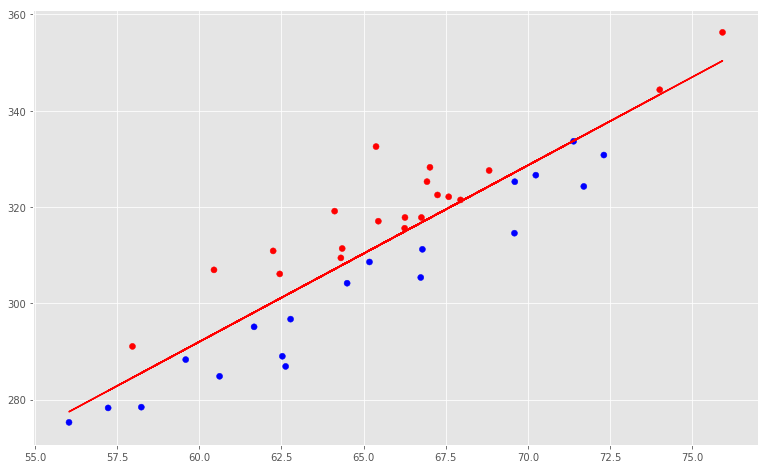

In [35]:
# График линейной регрессии. Под ним - стайеры, над ним - спринтеры

lineY = lr.predict(pd.DataFrame(df[100])).flatten()

plt.figure(figsize=(13,8))

line = plt.plot(df[100], lineY, color='red')

colors = numpy.where(df[400] > lineY, 'red', 'blue')
plt.scatter(df[100], df[400], color=colors)

plt.xlabel = 'Время на короткой дистанции, с'
plt.ylabel = 'Время на длинной дистанции, с'

plt.show()

In [36]:
# Специализация (спринтер/стайер)

athletes = [(ln, fn) for fn, ln in df[(df.gender == 'М')][['first_name', 'last_name']].values]

specializations2 = {(athlete[1], 'спринтер' if athlete[0] == 'red' else 'стайер') for athlete in zip(colors, athletes)}
specializations2

{(('Акульков', 'Данила'), 'спринтер'),
 (('Бабенко', 'Степан'), 'спринтер'),
 (('Байкачев', 'Евгений'), 'стайер'),
 (('Балахонов', 'Вячеслав'), 'стайер'),
 (('Бахметов', 'Иван'), 'стайер'),
 (('Безбородько', 'Вадим'), 'спринтер'),
 (('Быхавцов', 'Данила'), 'стайер'),
 (('Воронович', 'Кирилл'), 'стайер'),
 (('Грачёв', 'Стас'), 'стайер'),
 (('Гущин', 'Егор'), 'спринтер'),
 (('Данильченко', 'Павел'), 'спринтер'),
 (('Дедушкевич', 'Никита'), 'стайер'),
 (('Круковский', 'Владислав'), 'стайер'),
 (('Лаппо', 'Дмитрий'), 'стайер'),
 (('Лебенков', 'Денис'), 'стайер'),
 (('Мамонтов', 'Илья'), 'спринтер'),
 (('Машедо', 'Дмитрий'), 'стайер'),
 (('Медведев', 'Вячеслав'), 'спринтер'),
 (('Мохорев', 'Денис'), 'стайер'),
 (('Мудриченко', 'Денис'), 'стайер'),
 (('Назаренко', 'Родион'), 'спринтер'),
 (('Орловский', 'Богдан'), 'стайер'),
 (('Пехота', 'Дмитрий'), 'стайер'),
 (('Пятницкий', 'Егор'), 'спринтер'),
 (('Ракомский', 'Александр'), 'спринтер'),
 (('Савкин', 'Евгений'), 'спринтер'),
 (('Фрошин', '

In [37]:
# Классификация "на основании общих соображений и сравнения личных результатов" и 
# классификация на основании линейной регрессии и сравнения результатов разных спортсменов
# в ряде случаев не совпадают

# результаты ранее проведенной класификации скорее выявляют "потенциал" спортсмена (т.к. сделаны без оглядки на результаты других)
# результаты текущей класификации скорее выявляют "текущую картину" т.к. основаны дополнительно на сравнении результата спортсмена с другими

# Одинаково классифицированы, а, значит, наиболее достоверны:

set(specializations2) & set(specializations1)

{(('Акульков', 'Данила'), 'спринтер'),
 (('Балахонов', 'Вячеслав'), 'стайер'),
 (('Безбородько', 'Вадим'), 'спринтер'),
 (('Быхавцов', 'Данила'), 'стайер'),
 (('Круковский', 'Владислав'), 'стайер'),
 (('Лебенков', 'Денис'), 'стайер'),
 (('Мамонтов', 'Илья'), 'спринтер'),
 (('Мохорев', 'Денис'), 'стайер'),
 (('Назаренко', 'Родион'), 'спринтер'),
 (('Орловский', 'Богдан'), 'стайер'),
 (('Пятницкий', 'Егор'), 'спринтер'),
 (('Ракомский', 'Александр'), 'спринтер'),
 (('Чварков', 'Никита'), 'спринтер'),
 (('Шлег', 'Егор'), 'спринтер')}

In [38]:
# "Под вопросом":

set(specializations2) - set(specializations1)

{(('Бабенко', 'Степан'), 'спринтер'),
 (('Байкачев', 'Евгений'), 'стайер'),
 (('Бахметов', 'Иван'), 'стайер'),
 (('Воронович', 'Кирилл'), 'стайер'),
 (('Грачёв', 'Стас'), 'стайер'),
 (('Гущин', 'Егор'), 'спринтер'),
 (('Данильченко', 'Павел'), 'спринтер'),
 (('Дедушкевич', 'Никита'), 'стайер'),
 (('Лаппо', 'Дмитрий'), 'стайер'),
 (('Машедо', 'Дмитрий'), 'стайер'),
 (('Медведев', 'Вячеслав'), 'спринтер'),
 (('Мудриченко', 'Денис'), 'стайер'),
 (('Пехота', 'Дмитрий'), 'стайер'),
 (('Савкин', 'Евгений'), 'спринтер'),
 (('Фрошин', 'Влад'), 'стайер'),
 (('Чугуй', 'Яков'), 'спринтер'),
 (('Янков', 'Антон'), 'спринтер')}

**Посмотрим как создать модель линейной регрессии при нескольких переменных-факторах**

In [83]:
dolphin50 = competitions_df[(competitions_df['distance'] == 50) & (competitions_df['style'] == 'баттерфляй')][['last_name', 'first_name', 'birth_year', 'result_s']]
free50 = competitions_df[(competitions_df['distance'] == 50) & (competitions_df['style'] == 'вольный стиль')][['last_name', 'first_name', 'birth_year', 'result_s']]
breast50 = competitions_df[(competitions_df['distance'] == 50) & (competitions_df['style'] == 'брасс')][['last_name', 'first_name', 'birth_year', 'result_s']]
back50 = competitions_df[(competitions_df['distance'] == 50) & (competitions_df['style'] == 'на спине')][['last_name', 'first_name', 'birth_year', 'result_s']]
medley100 = competitions_df[(competitions_df['distance'] == 100) & (competitions_df['style'] == 'комплексное плавание')][['last_name', 'first_name', 'birth_year', 'result_s']]

athletes_df = medley100[['last_name', 'first_name', 'birth_year']]

df_merged = pd.merge(athletes_df, dolphin50, on=['last_name', 'first_name', 'birth_year'], suffixes=('_','_50_d'), how='inner')
df_merged = pd.merge(df_merged, free50, on=['last_name', 'first_name', 'birth_year'], suffixes=('_50_d','_50_f'), how='inner')
df_merged = pd.merge(df_merged, breast50, on=['last_name', 'first_name', 'birth_year'], suffixes=('_50_f','_50_br'), how='inner')
df_merged = pd.merge(df_merged, back50, on=['last_name', 'first_name', 'birth_year'], suffixes=('_50_br','_50_bk'), how='inner')
df_merged = pd.merge(df_merged, medley100, on=['last_name', 'first_name', 'birth_year'], suffixes=('_50_bk','_100_m'), how='inner')

df_merged.head()

# df_merged['result_100_est'] = (df_merged['result_s_50_d'] + df_merged['result_s_50_f'] + df_merged['result_s_50_br'] + df_merged['result_s_50_bk'])/2
# df_merged['k_zamedl'] = df_merged['result_s_100_m'] / df_merged['result_100_est'] 

# df_merged = df_merged.dropna(how='all')

# print(df_merged['k_zamedl'].mean())
# (df[400]/4/df[100]).mean()

,last_name,first_name,birth_year,result_s_50_d,result_s_50_f,result_s_50_br,result_s_50_bk,result_s
0,Евмененко,София,2007,33.50,30.83,41.93,37.20,76.26
1,Редюк,Алина,2007,35.44,32.70,42.24,40.10,79.31
2,Гисак,Анна,2007,36.96,33.04,45.01,38.13,81.90
3,Серикова,Валерия,2007,39.66,32.39,45.68,39.72,83.30
4,Карпочева,Екатерина,2007,36.62,33.38,47.50,38.16,83.54


In [171]:
lr = LinearRegression()

X = df_merged[['result_s_50_d', 'result_s_50_f', 'result_s_50_br', 'result_s_50_bk']]
Y = df_merged['result_s']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

lr.fit(x_train, y_train)

# print('Коэффициенты линейной регрессии b0 = {}, b1 = {}'.format(lr.intercept_, lr.coef_))
print(pd.DataFrame(lr.coef_, X.columns, columns=['Coefficients']))

print('\nКоэффициент детерминации: {}'.format(lr.score(X, Y)))

                Coefficients
result_s_50_d       0.256587
result_s_50_f       0.785913
result_s_50_br      0.671470
result_s_50_bk      0.611057

Коэффициент детерминации: 0.9512717896475233


In [131]:
# Таблица с переменными-факторами и откликом

plt.figure(figsize=(13,8))

lr_df = x_test.copy()
lr_df['y_predict'] = lr.predict(x_test)
lr_df['result_s'] = y_test
    
lr_df

# интересно сравнить строки с индексами 26 и 27

,result_s_50_d,result_s_50_f,result_s_50_br,result_s_50_bk,y_predict,result_s
26,41.77,36.47,43.99,41.06,86.834933,93.40
8,39.90,34.08,55.29,41.25,92.180491,86.34
54,32.34,32.09,42.56,34.96,76.285368,77.57
113,49.64,34.55,47.59,43.28,91.119156,93.71
43,53.77,45.63,65.46,52.52,118.532111,114.79
84,39.41,34.38,49.41,40.60,87.945108,87.38
22,43.06,35.71,50.93,43.87,92.945706,92.06
50,30.77,28.46,39.00,35.27,70.828656,73.97
45,54.25,43.43,61.44,50.41,112.937625,115.84
24,43.77,35.05,49.62,41.00,89.975821,92.42


<Figure size 936x576 with 0 Axes>

**Задача кластеризации**

K-Means

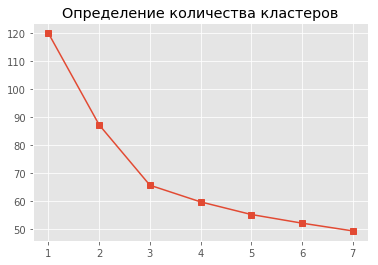

In [139]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(numpy.sqrt(kmeans.inertia_))

plt.plot(range(1, 8), inertia, marker='s');
plt.title('Определение количества кластеров')
plt.show()


**Излом кривой в точке k=3**

Будем ориетироваться на такое число кластеров (распространенное эвристическое правило)

На графике выше - функция J(С) суммы квадратов расстояний от точек до центроидов кластеров, к которым они относятся.

In [176]:
kmeans = KMeans(n_clusters=3, random_state=1).fit(X)

print(
      'Центроиды кластеров: \n\n', 
      pd.DataFrame(kmeans.cluster_centers_, columns=['дельфин', 'в/с', 'брасс', 'спина'])
     )

Центроиды кластеров: 

      дельфин        в/с      брасс      спина
0  44.902000  37.123077  50.838000  43.570615
1  38.132542  33.368305  45.048814  39.594407
2  55.580833  46.049167  61.462500  52.890833


In [179]:
# Первый кластер:

df_merged[kmeans.labels_ == 0].head()

,last_name,first_name,birth_year,result_s_50_d,result_s_50_f,result_s_50_br,result_s_50_bk,result_s
8,Яцук,Александра,2007,39.90,34.08,55.29,41.25,86.34
15,Хурошвили,Мария,2007,54.97,34.19,43.78,42.03,87.44
17,Марьевская,Виктория,2007,43.72,38.11,44.92,42.02,88.05
19,Горшунова,Амина,2008,39.70,35.78,49.41,43.73,90.18
20,Суслова,Валерия,2008,40.41,36.11,49.85,41.81,91.11


In [180]:
# Второй кластер:

df_merged[kmeans.labels_ == 1].head()

,last_name,first_name,birth_year,result_s_50_d,result_s_50_f,result_s_50_br,result_s_50_bk,result_s
0,Евмененко,София,2007,33.50,30.83,41.93,37.20,76.26
1,Редюк,Алина,2007,35.44,32.70,42.24,40.10,79.31
2,Гисак,Анна,2007,36.96,33.04,45.01,38.13,81.90
3,Серикова,Валерия,2007,39.66,32.39,45.68,39.72,83.30
4,Карпочева,Екатерина,2007,36.62,33.38,47.50,38.16,83.54


In [181]:
# Третий кластер:
df_merged[kmeans.labels_ == 2].head()

,last_name,first_name,birth_year,result_s_50_d,result_s_50_f,result_s_50_br,result_s_50_bk,result_s
39,Шода,Мария,2008,51.43,41.00,59.61,50.93,107.23
40,Корниенко,Елизавета,2008,55.38,47.14,53.52,51.13,110.31
41,Кашина,Кира,2007,61.93,47.86,61.69,48.17,112.32
42,Близнец,Анастасия,2008,50.93,46.78,61.24,53.63,114.85
43,Тартынская,Ксения,2007,53.77,45.63,65.46,52.52,114.79


In [182]:
# предсказание к какому кластеру отнести наблюдение

kmeans.predict([[50.93, 46.78, 61.24, 53.63]])

array([2], dtype=int32)